In [ ]:
#Importing Libraries
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from nltk.cluster import KMeansClusterer, cosine_distance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import seaborn as sns
%matplotlib inline

In [ ]:
#Importing data and selecting questions which has answers
#a = pd.read_excel("data_preprocessed.xlsx")
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data_preprocessed.csv')

In [ ]:
df = data[data['answer_count']>0]

In [ ]:
#Checking the data 
df.head()

,tags,is_answered,view_count,answer_count,score,last_activity_date,creation_date,question_id,link,title,accepted_answer_id
0,"['python', 'excel', 'tkinter', 'row', 'openpyxl']",True,46,1,2,2022-04-27,2022-04-25,72005204,https://stackoverflow.com/questions/72005204/c...,changing row excel file row filled,72005405.0
1,"['python', 'try-catch']",True,47,3,2,2022-04-27,2022-04-26,72020038,https://stackoverflow.com/questions/72020038/r...,raise string variable exception,NaN
2,"['python', 'matplotlib']",True,9267,3,2,2022-04-27,2019-06-21,56704699,https://stackoverflow.com/questions/56704699/w...,matplotlib plot kind bar plot different plot,56706020.0
3,"['python', 'datetime', 'date', 'timezone']",True,469727,19,421,2022-04-27,2010-12-25,4530069,https://stackoverflow.com/questions/4530069/ho...,get value datetime today python timezone aware,4530166.0
4,"['python', 'modbus', 'rs485', 'pymodbus']",True,650,2,2,2022-04-27,2020-06-17,62418945,https://stackoverflow.com/questions/62418945/m...,modbus python schneider pm5300,62424060.0


In [ ]:
text = list(df['title'])
text[0]

'changing row excel file row filled'

In [ ]:
#LDA
tf_vectorizer = CountVectorizer(min_df=5, stop_words='english')
tf = tf_vectorizer.fit_transform(df['title'].values.astype('U'))

tf_feature_names = tf_vectorizer.get_feature_names_out()


In [ ]:
#LDA
num_topics = 10

lda = LatentDirichletAllocation(n_components=num_topics, learning_method='batch',\
                                max_iter=50,verbose=1,
                                evaluate_every=1, n_jobs=1,
                                random_state=0).fit(tf)

iteration: 1 of max_iter: 50, perplexity: 1948.1574
iteration: 2 of max_iter: 50, perplexity: 1578.9085
iteration: 3 of max_iter: 50, perplexity: 1366.6170
iteration: 4 of max_iter: 50, perplexity: 1251.4956
iteration: 5 of max_iter: 50, perplexity: 1189.7454
iteration: 6 of max_iter: 50, perplexity: 1155.6354
iteration: 7 of max_iter: 50, perplexity: 1134.9025
iteration: 8 of max_iter: 50, perplexity: 1121.3358
iteration: 9 of max_iter: 50, perplexity: 1112.4458
iteration: 10 of max_iter: 50, perplexity: 1106.7289
iteration: 11 of max_iter: 50, perplexity: 1102.7448
iteration: 12 of max_iter: 50, perplexity: 1099.6973
iteration: 13 of max_iter: 50, perplexity: 1097.6665
iteration: 14 of max_iter: 50, perplexity: 1096.0606
iteration: 15 of max_iter: 50, perplexity: 1094.8217
iteration: 16 of max_iter: 50, perplexity: 1094.0024
iteration: 17 of max_iter: 50, perplexity: 1093.4117
iteration: 18 of max_iter: 50, perplexity: 1092.9418
iteration: 19 of max_iter: 50, perplexity: 1092.6070
it

In [ ]:
num_top_words=20

for topic_idx, topic in enumerate(lda.components_):
    print ("Topic %d:" % (topic_idx))
    # print out top 20 words per topic 
    words=[(tf_feature_names[i],topic[i]) for i in topic.argsort()[::-1][0:num_top_words]]
    print(words)
    print("\n")

Topic 0:
[('python', 17828.757115671033), ('file', 16748.0999440307), ('string', 10379.202761379285), ('using', 5688.920265471403), ('csv', 5081.099963333074), ('json', 5009.099933066337), ('text', 4644.618736898206), ('files', 4070.650599234492), ('data', 3358.3711580832774), ('read', 3145.0999465832715), ('convert', 2785.3815871845686), ('line', 2567.389476833837), ('regex', 2546.0999707453548), ('extract', 2385.071400032404), ('format', 2062.100904161067), ('remove', 1963.728255053588), ('write', 1952.7609350086952), ('excel', 1930.099960170601), ('multiple', 1791.2204172146594), ('specific', 1787.2605257221323)]


Topic 1:
[('django', 12585.099968202907), ('object', 4566.699165658829), ('attribute', 3923.0999541211677), ('py', 3570.099950246544), ('user', 2622.1837760404537), ('discord', 2613.0999852110062), ('using', 2085.868551654136), ('field', 2007.099958470512), ('query', 1872.0999417247972), ('attributeerror', 1796.0999744931837), ('model', 1789.4984947071562), ('form', 1702.

In [ ]:
# Generate topic assignment of each document
topic_assign=lda.transform(tf)

clusters=topic_assign.argmax(axis=1)
# or argsort is also fine

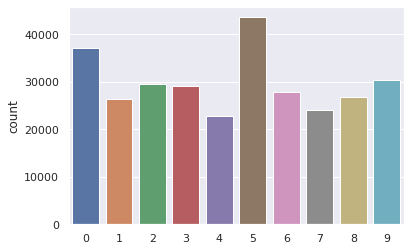

In [ ]:
sns.set(style="darkgrid")
sns.countplot(x=clusters)

In [ ]:
#KMeans 2.seçenek

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(df['title'].values.astype('U'))

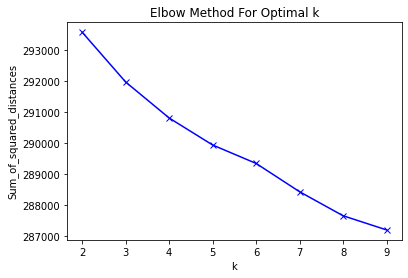

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
so=pd.DataFrame(list(zip(df['title'],labels)),columns=['title','cluster'])
print(so.sort_values(by=['cluster']))

                                                    title  cluster
149008                         number calendar weeks year        0
138268                difference concatenating comma plus        0
138269      create constraint multiple columns sqlalchemy        0
256851         models trained tensorflow available django        0
138272  int insert np array float array becomes float ...        0
...                                                   ...      ...
267042                        multiprocessing output file        5
267037                     add identifier lines text file        5
267033                         loop certain part csv file        5
103732                  parse file certain content python        5
0                      changing row excel file row filled        5

[298017 rows x 2 columns]


Cluster: 0
Titles


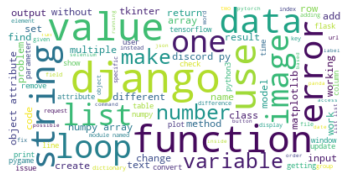

Cluster: 1
Titles


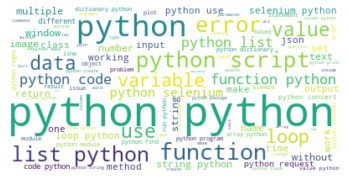

Cluster: 2
Titles


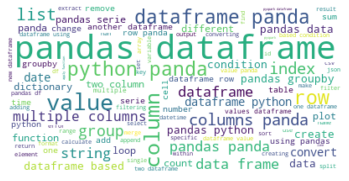

Cluster: 3
Titles


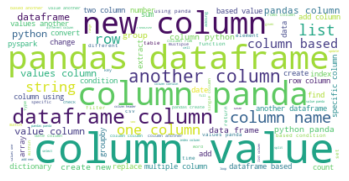

Cluster: 4
Titles


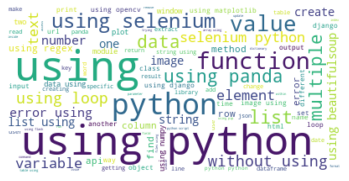

Cluster: 5
Titles


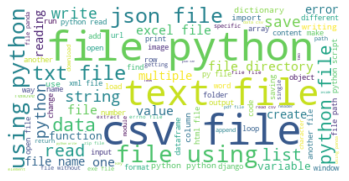

In [ ]:
from wordcloud import WordCloud
result={'cluster':labels,'title':df['title']}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['title'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=so[so.cluster==k]['title']         
   #print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()